In [60]:
# Import necessary libraries
import sys
sys.path.append('../src')  # Add the src directory to the system path

from data_loader import DataLoader
from data_quality_check import DataQualityCheck
from data_clean_processing import DataCleanProcessing

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score,f1_score
import xgboost as xgb

In [34]:
# Load the data
file_path = '../data/MachineLearningRating_v3.txt'
data_loader = DataLoader(file_path)
data = data_loader.load_data()

In [35]:
# Display basic info and head of the data
data_loader.basic_info()
data_loader.display_head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000098 entries, 0 to 1000097
Data columns (total 52 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   UnderwrittenCoverID       1000098 non-null  int64  
 1   PolicyID                  1000098 non-null  int64  
 2   TransactionMonth          1000098 non-null  object 
 3   IsVATRegistered           1000098 non-null  bool   
 4   Citizenship               1000098 non-null  object 
 5   LegalType                 1000098 non-null  object 
 6   Title                     1000098 non-null  object 
 7   Language                  1000098 non-null  object 
 8   Bank                      854137 non-null   object 
 9   AccountType               959866 non-null   object 
 10  MaritalStatus             991839 non-null   object 
 11  Gender                    990562 non-null   object 
 12  Country                   1000098 non-null  object 
 13  Province                  1

,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,145255,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0
4,145255,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0


In [36]:
# Checking Missing Values
data_quality = DataQualityCheck(file_path)
data = data_quality.load_data()
data_quality.basic_info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000098 entries, 0 to 1000097
Data columns (total 52 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   UnderwrittenCoverID       1000098 non-null  int64  
 1   PolicyID                  1000098 non-null  int64  
 2   TransactionMonth          1000098 non-null  object 
 3   IsVATRegistered           1000098 non-null  bool   
 4   Citizenship               1000098 non-null  object 
 5   LegalType                 1000098 non-null  object 
 6   Title                     1000098 non-null  object 
 7   Language                  1000098 non-null  object 
 8   Bank                      854137 non-null   object 
 9   AccountType               959866 non-null   object 
 10  MaritalStatus             991839 non-null   object 
 11  Gender                    990562 non-null   object 
 12  Country                   1000098 non-null  object 
 13  Province                  1

In [37]:
# Clean the data
data_cleaner = DataCleanProcessing(data)
cleaned_data = data_cleaner.clean_missing_values()

# Verify no missing values
print("Verification of no missing values:", data_cleaner.verify_no_missing_values())

d:\Insurance_Claims_Analysis\notebooks\../src\data_clean_processing.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned[column] = data_cleaned[column].fillna(median)
d:\Insurance_Claims_Analysis\notebooks\../src\data_clean_processing.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned[column] = data_cleaned[column].fillna(median)
d:\Insurance_Claims_Analysis\notebooks\../src\data_clean_processing.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

Verification of no missing values: True


In [38]:
# Display the first few rows of the cleaned data
cleaned_data.head()

,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,145255,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0
4,145255,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0


In [39]:
# Display the shape of the dataframe after cleaning, to check any drop column.
cleaned_data.shape

(1000098, 46)

In [40]:
# Display information about the dataframe
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000098 entries, 0 to 1000097
Data columns (total 46 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   UnderwrittenCoverID       1000098 non-null  int64  
 1   PolicyID                  1000098 non-null  int64  
 2   TransactionMonth          1000098 non-null  object 
 3   IsVATRegistered           1000098 non-null  bool   
 4   Citizenship               1000098 non-null  object 
 5   LegalType                 1000098 non-null  object 
 6   Title                     1000098 non-null  object 
 7   Language                  1000098 non-null  object 
 8   Bank                      1000098 non-null  object 
 9   AccountType               1000098 non-null  object 
 10  MaritalStatus             1000098 non-null  object 
 11  Gender                    1000098 non-null  object 
 12  Country                   1000098 non-null  object 
 13  Province                  1

In [41]:
cleaned_data.dtypes

UnderwrittenCoverID           int64
PolicyID                      int64
TransactionMonth             object
IsVATRegistered                bool
Citizenship                  object
LegalType                    object
Title                        object
Language                     object
Bank                         object
AccountType                  object
MaritalStatus                object
Gender                       object
Country                      object
Province                     object
PostalCode                    int64
MainCrestaZone               object
SubCrestaZone                object
ItemType                     object
mmcode                      float64
VehicleType                  object
RegistrationYear              int64
make                         object
Model                        object
Cylinders                   float64
cubiccapacity               float64
kilowatts                   float64
bodytype                     object
NumberOfDoors               

In [42]:
cleaned_data.count()

UnderwrittenCoverID         1000098
PolicyID                    1000098
TransactionMonth            1000098
IsVATRegistered             1000098
Citizenship                 1000098
LegalType                   1000098
Title                       1000098
Language                    1000098
Bank                        1000098
AccountType                 1000098
MaritalStatus               1000098
Gender                      1000098
Country                     1000098
Province                    1000098
PostalCode                  1000098
MainCrestaZone              1000098
SubCrestaZone               1000098
ItemType                    1000098
mmcode                      1000098
VehicleType                 1000098
RegistrationYear            1000098
make                        1000098
Model                       1000098
Cylinders                   1000098
cubiccapacity               1000098
kilowatts                   1000098
bodytype                    1000098
NumberOfDoors               

In [43]:
cleaned_data.isnull().sum()

UnderwrittenCoverID         0
PolicyID                    0
TransactionMonth            0
IsVATRegistered             0
Citizenship                 0
LegalType                   0
Title                       0
Language                    0
Bank                        0
AccountType                 0
MaritalStatus               0
Gender                      0
Country                     0
Province                    0
PostalCode                  0
MainCrestaZone              0
SubCrestaZone               0
ItemType                    0
mmcode                      0
VehicleType                 0
RegistrationYear            0
make                        0
Model                       0
Cylinders                   0
cubiccapacity               0
kilowatts                   0
bodytype                    0
NumberOfDoors               0
VehicleIntroDate            0
AlarmImmobiliser            0
TrackingDevice              0
CapitalOutstanding          0
NewVehicle                  0
SumInsured

In [44]:
# Replace the original data with the cleaned data
data = cleaned_data

In [45]:
df = pd.DataFrame(data)

# Use the head() method to display the first few rows of the DataFrame
head_df = df.head()

# Print the head of the DataFrame
print("The head of the DataFrame is:\n", head_df)

The head of the DataFrame is:
    UnderwrittenCoverID  PolicyID     TransactionMonth  IsVATRegistered  \
0               145249     12827  2015-03-01 00:00:00             True   
1               145249     12827  2015-05-01 00:00:00             True   
2               145249     12827  2015-07-01 00:00:00             True   
3               145255     12827  2015-05-01 00:00:00             True   
4               145255     12827  2015-07-01 00:00:00             True   

  Citizenship          LegalType Title Language                 Bank  \
0              Close Corporation    Mr  English  First National Bank   
1              Close Corporation    Mr  English  First National Bank   
2              Close Corporation    Mr  English  First National Bank   
3              Close Corporation    Mr  English  First National Bank   
4              Close Corporation    Mr  English  First National Bank   

       AccountType  ...                    ExcessSelected CoverCategory  \
0  Current accou

In [46]:
# Detect missing values
missing_values = df.isnull()
print("Missing values in the DataFrame:\n", missing_values)

# Count missing values in each column
missing_count = df.isnull().sum()
print("Count of missing values in each column:\n", missing_count)

Missing values in the DataFrame:
          UnderwrittenCoverID  PolicyID  TransactionMonth  IsVATRegistered  \
0                      False     False             False            False   
1                      False     False             False            False   
2                      False     False             False            False   
3                      False     False             False            False   
4                      False     False             False            False   
...                      ...       ...               ...              ...   
1000093                False     False             False            False   
1000094                False     False             False            False   
1000095                False     False             False            False   
1000096                False     False             False            False   
1000097                False     False             False            False   

         Citizenship  LegalType  Title  L

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000098 entries, 0 to 1000097
Data columns (total 46 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   UnderwrittenCoverID       1000098 non-null  int64  
 1   PolicyID                  1000098 non-null  int64  
 2   TransactionMonth          1000098 non-null  object 
 3   IsVATRegistered           1000098 non-null  bool   
 4   Citizenship               1000098 non-null  object 
 5   LegalType                 1000098 non-null  object 
 6   Title                     1000098 non-null  object 
 7   Language                  1000098 non-null  object 
 8   Bank                      1000098 non-null  object 
 9   AccountType               1000098 non-null  object 
 10  MaritalStatus             1000098 non-null  object 
 11  Gender                    1000098 non-null  object 
 12  Country                   1000098 non-null  object 
 13  Province                  1

In [48]:
# Basic statistical details
data.describe()

,UnderwrittenCoverID,PolicyID,PostalCode,mmcode,RegistrationYear,Cylinders,cubiccapacity,kilowatts,NumberOfDoors,SumInsured,CalculatedPremiumPerTerm,TotalPremium,TotalClaims
count,1.000098e+06,1.000098e+06,1.000098e+06,1.000098e+06,1.000098e+06,1.000098e+06,1.000098e+06,1.000098e+06,1.000098e+06,1.000098e+06,1.000098e+06,1.000098e+06,1.000098e+06
mean,1.048175e+05,7.956682e+03,3.020601e+03,5.488056e+07,2.010225e+03,4.046616e+00,2.466869e+03,9.721553e+01,4.019239e+00,6.041727e+05,1.178757e+02,6.190550e+01,6.486119e+01
std,6.329371e+04,5.290039e+03,2.649854e+03,1.360059e+07,3.261391e+00,2.939410e-01,4.427106e+02,1.939061e+01,4.681854e-01,1.508332e+06,3.997017e+02,2.302845e+02,2.384075e+03
min,1.000000e+00,1.400000e+01,1.000000e+00,4.041200e+06,1.987000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e-02,0.000000e+00,-7.825768e+02,-1.200241e+04
25%,5.514300e+04,4.500000e+03,8.270000e+02,6.005692e+07,2.008000e+03,4.000000e+00,2.237000e+03,7.500000e+01,4.000000e+00,5.000000e+03,3.224800e+00,0.000000e+00,0.000000e+00
50%,9.408300e+04,7.071000e+03,2.000000e+03,6.005842e+07,2.011000e+03,4.000000e+00,2.694000e+03,1.110000e+02,4.000000e+00,7.500000e+03,8.436900e+00,2.178333e+00,0.000000e+00
75%,1.391900e+05,1.107700e+04,4.180000e+03,6.005842e+07,2.013000e+03,4.000000e+00,2.694000e+03,1.110000e+02,4.000000e+00,2.500000e+05,9.000000e+01,2.192982e+01,0.000000e+00
max,3.011750e+05,2.324600e+04,9.870000e+03,6.506535e+07,2.015000e+03,1.000000e+01,1.288000e+04,3.090000e+02,6.000000e+00,1.263620e+07,7.442217e+04,6.528260e+04,3.930921e+05


In [49]:
# Removing duplicate rows.
print('Duplicate Rows Count : ', data.duplicated().sum())
data=data.drop_duplicates(keep="first")

Duplicate Rows Count :  74


In [50]:
data.shape

(1000024, 46)

In [52]:
data.columns

Index(['UnderwrittenCoverID', 'PolicyID', 'TransactionMonth',
       'IsVATRegistered', 'Citizenship', 'LegalType', 'Title', 'Language',
       'Bank', 'AccountType', 'MaritalStatus', 'Gender', 'Country', 'Province',
       'PostalCode', 'MainCrestaZone', 'SubCrestaZone', 'ItemType', 'mmcode',
       'VehicleType', 'RegistrationYear', 'make', 'Model', 'Cylinders',
       'cubiccapacity', 'kilowatts', 'bodytype', 'NumberOfDoors',
       'VehicleIntroDate', 'AlarmImmobiliser', 'TrackingDevice',
       'CapitalOutstanding', 'NewVehicle', 'SumInsured', 'TermFrequency',
       'CalculatedPremiumPerTerm', 'ExcessSelected', 'CoverCategory',
       'CoverType', 'CoverGroup', 'Section', 'Product', 'StatutoryClass',
       'StatutoryRiskType', 'TotalPremium', 'TotalClaims'],
      dtype='object')

### Data Preparation

In [53]:

# Feature Engineering: Create new features that might be relevant to TotalPremium and TotalClaims
cleaned_data['RiskLevel'] = cleaned_data['TotalClaims'] / cleaned_data['SumInsured']
cleaned_data['ProfitMargin'] = cleaned_data['TotalPremium'] - cleaned_data['TotalClaims']


C:\Users\matiwos.desalegn\AppData\Local\Temp\ipykernel_5780\4277864676.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['RiskLevel'] = cleaned_data['TotalClaims'] / cleaned_data['SumInsured']
C:\Users\matiwos.desalegn\AppData\Local\Temp\ipykernel_5780\4277864676.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['ProfitMargin'] = cleaned_data['TotalPremium'] - cleaned_data['TotalClaims']


### Encoding Categorical Data

In [54]:
# Convert categorical data into a numeric format using one-hot encoding or label encoding
label_enc_cols = ['TransactionMonth', 'Citizenship', 'LegalType', 'Title', 'Language', 'Bank', 'AccountType',
                  'MaritalStatus', 'Gender', 'Country', 'Province', 'MainCrestaZone', 'SubCrestaZone', 'ItemType',
                  'VehicleType', 'make', 'Model', 'bodytype', 'VehicleIntroDate', 'AlarmImmobiliser',
                  'TrackingDevice', 'CapitalOutstanding', 'NewVehicle', 'TermFrequency', 'ExcessSelected',
                  'CoverCategory', 'CoverType', 'CoverGroup', 'Section', 'Product', 'StatutoryClass', 'StatutoryRiskType']

for col in label_enc_cols:
    le = LabelEncoder()
    cleaned_data[col] = le.fit_transform(cleaned_data[col])

C:\Users\matiwos.desalegn\AppData\Local\Temp\ipykernel_5780\1591226506.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data[col] = le.fit_transform(cleaned_data[col])
C:\Users\matiwos.desalegn\AppData\Local\Temp\ipykernel_5780\1591226506.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data[col] = le.fit_transform(cleaned_data[col])
C:\Users\matiwos.desalegn\AppData\Local\Temp\ipykernel_5780\1591226506.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

In [55]:
# Selecting features and target variable
features = cleaned_data.drop(columns=['TotalPremium', 'TotalClaims'])
target_premium = cleaned_data['TotalPremium']
target_claims = cleaned_data['TotalClaims']

In [56]:
# Train-Test Split: Divide the data into a training set and a test set
X_train, X_test, y_train_premium, y_test_premium = train_test_split(features, target_premium, test_size=0.3, random_state=42)
X_train, X_test, y_train_claims, y_test_claims = train_test_split(features, target_claims, test_size=0.3, random_state=42)

### Model Building

In [57]:
# Linear Regression
lin_reg_premium = LinearRegression()
lin_reg_premium.fit(X_train, y_train_premium)
y_pred_premium_lr = lin_reg_premium.predict(X_test)

lin_reg_claims = LinearRegression()
lin_reg_claims.fit(X_train, y_train_claims)
y_pred_claims_lr = lin_reg_claims.predict(X_test)

In [61]:
# Decision Tree
dt_reg_premium = DecisionTreeRegressor(random_state=42)
dt_reg_premium.fit(X_train, y_train_premium)
y_pred_premium_dt = dt_reg_premium.predict(X_test)

dt_reg_claims = DecisionTreeRegressor(random_state=42)
dt_reg_claims.fit(X_train, y_train_claims)
y_pred_claims_dt = dt_reg_claims.predict(X_test)

In [62]:
# Random Forest
rf_reg_premium = RandomForestRegressor(random_state=42, n_estimators=100)
rf_reg_premium.fit(X_train, y_train_premium)
y_pred_premium_rf = rf_reg_premium.predict(X_test)

rf_reg_claims = RandomForestRegressor(random_state=42, n_estimators=100)
rf_reg_claims.fit(X_train, y_train_claims)
y_pred_claims_rf = rf_reg_claims.predict(X_test)

In [63]:
# XGBoost
xgb_reg_premium = xgb.XGBRegressor(random_state=42, n_estimators=100)
xgb_reg_premium.fit(X_train, y_train_premium)
y_pred_premium_xgb = xgb_reg_premium.predict(X_test)

xgb_reg_claims = xgb.XGBRegressor(random_state=42, n_estimators=100)
xgb_reg_claims.fit(X_train, y_train_claims)
y_pred_claims_xgb = xgb_reg_claims.predict(X_test)

### Model Evaluation

In [64]:
def evaluate_model(y_test, y_pred):
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    return mae, mse, rmse, r2

print("Linear Regression - TotalPremium: ", evaluate_model(y_test_premium, y_pred_premium_lr))
print("Linear Regression - TotalClaims: ", evaluate_model(y_test_claims, y_pred_claims_lr))

print("Decision Tree - TotalPremium: ", evaluate_model(y_test_premium, y_pred_premium_dt))
print("Decision Tree - TotalClaims: ", evaluate_model(y_test_claims, y_pred_claims_dt))

print("Random Forest - TotalPremium: ", evaluate_model(y_test_premium, y_pred_premium_rf))
print("Random Forest - TotalClaims: ", evaluate_model(y_test_claims, y_pred_claims_rf))

print("XGBoost - TotalPremium: ", evaluate_model(y_test_premium, y_pred_premium_xgb))
print("XGBoost - TotalClaims: ", evaluate_model(y_test_claims, y_pred_claims_xgb))

Linear Regression - TotalPremium:  (58.10973961049986, 28215.29089668528, 167.9740780498148, 0.4679898400346938)
Linear Regression - TotalClaims:  (58.10973961050538, 28215.29089668696, 167.9740780498198, 0.9947874950021132)
Decision Tree - TotalPremium:  (0.3348075323544235, 12547.0766284542, 112.01373410637733, 0.7634200452285583)
Decision Tree - TotalClaims:  (1.049087853787722, 16045.982211317392, 126.6727366536201, 0.9970356583322586)
Random Forest - TotalPremium:  (0.3775544541873908, 5252.730198100373, 72.47572143897825, 0.9009577521926498)
Random Forest - TotalClaims:  (0.78528641480882, 12220.886202220685, 110.54811713557443, 0.9977423082171674)
XGBoost - TotalPremium:  (1.2182627431568311, 16737.326763275643, 129.37282080590052, 0.6844112675879601)
XGBoost - TotalClaims:  (52.16324322050215, 3200758.2085252316, 1789.0662951733318, 0.4086905493884513)


### Feature Importance Analysis

Random Forest Feature Importance - TotalPremium


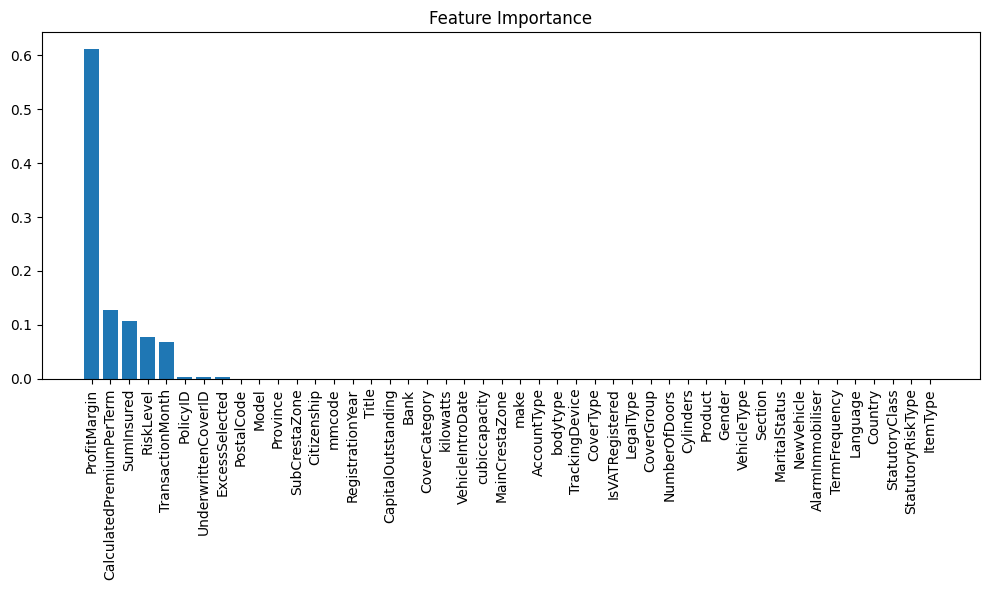

Random Forest Feature Importance - TotalClaims


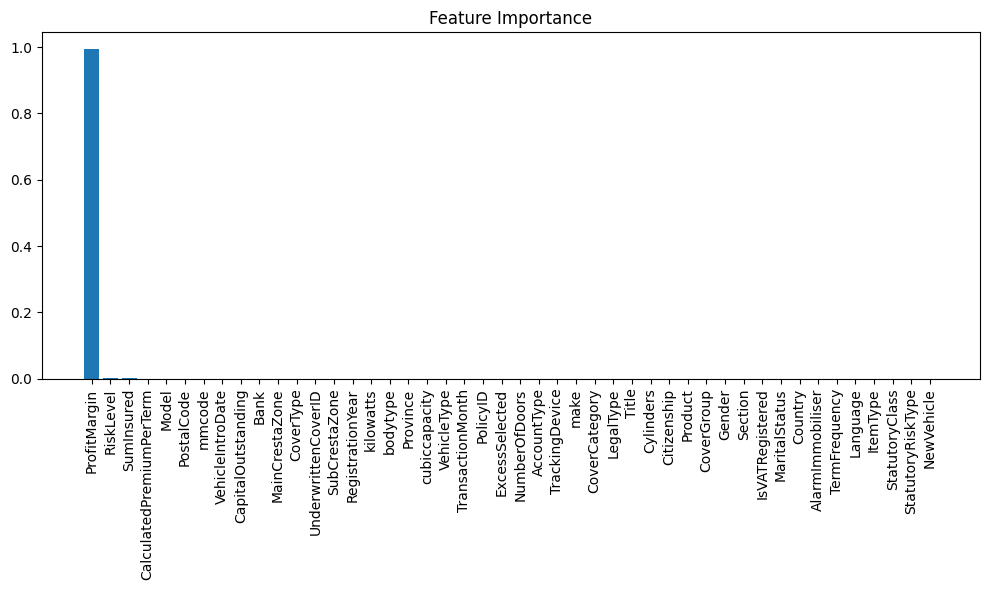

XGBoost Feature Importance - TotalPremium


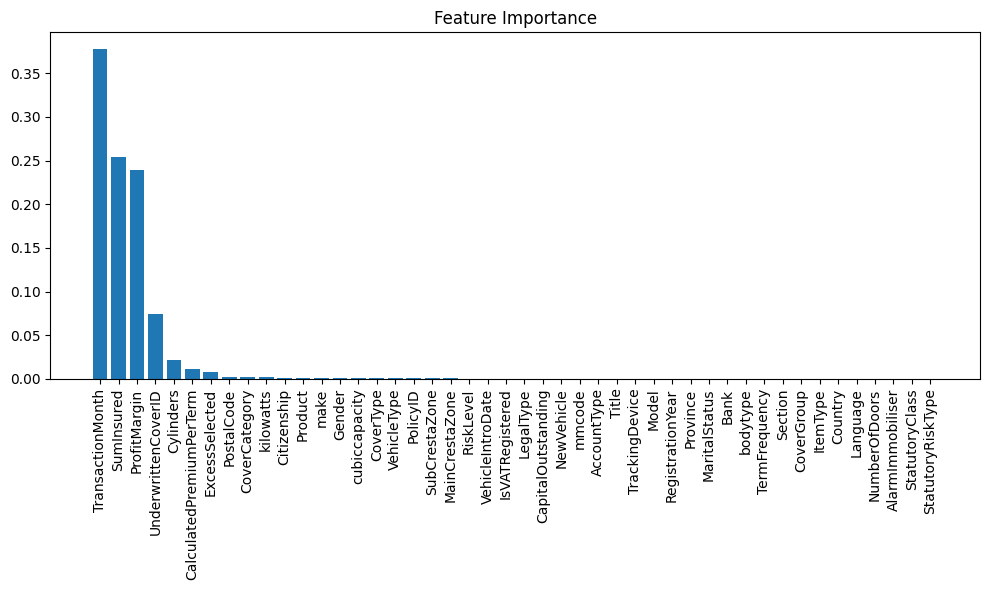

XGBoost Feature Importance - TotalClaims


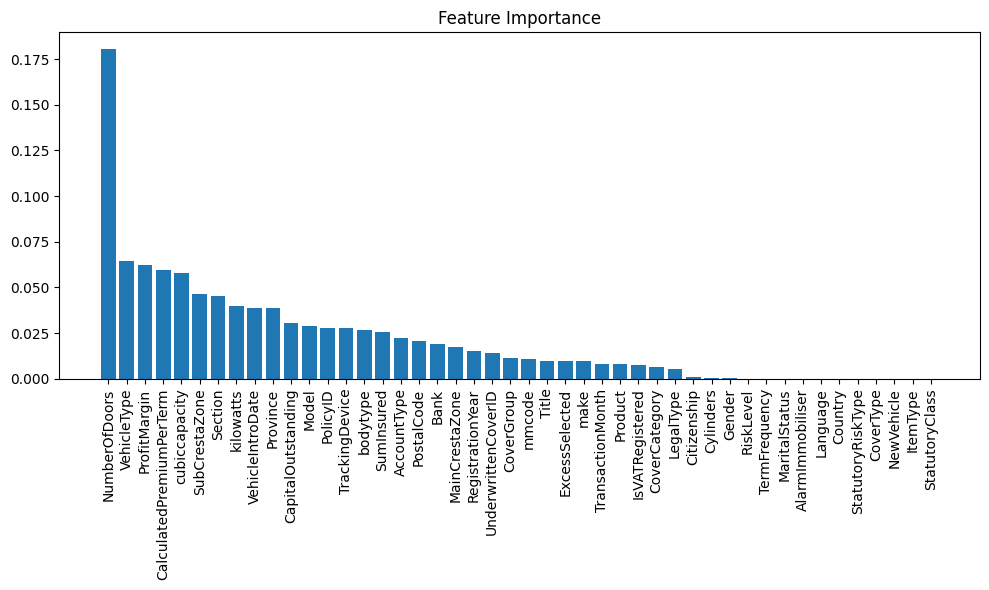

In [65]:
def plot_feature_importance(model, features):
    importance = model.feature_importances_
    indices = np.argsort(importance)[::-1]
    plt.figure(figsize=(10, 6))
    plt.title("Feature Importance")
    plt.bar(range(len(indices)), importance[indices], align='center')
    plt.xticks(range(len(indices)), [features.columns[i] for i in indices], rotation=90)
    plt.tight_layout()
    plt.show()

print("Random Forest Feature Importance - TotalPremium")
plot_feature_importance(rf_reg_premium, features)

print("Random Forest Feature Importance - TotalClaims")
plot_feature_importance(rf_reg_claims, features)

print("XGBoost Feature Importance - TotalPremium")
plot_feature_importance(xgb_reg_premium, features)

print("XGBoost Feature Importance - TotalClaims")
plot_feature_importance(xgb_reg_claims, features)